# Emojify

In [29]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load dataset

In [7]:
X_train, Y_train = read_csv('data/emojify_data.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [3]:
print(x_train.shape)
print(x_test.shape)

(183,)
(56,)


In [8]:
index = 1
print(X_train[index], label_to_emoji(Y_train[index]))

work is horrible 😞


In [10]:
maxLen = len(max(X_train, key=len).split())

In [15]:
Y_train.shape

(183,)

In [16]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [25]:
index = 30
print(Y_train[index], " is converted to ", Y_oh_train[index])

2  is converted to  [0. 0. 1. 0. 0.]


## 2. Implementing Emojifier-V1

In [30]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove/glove.6B.50d.txt')

In [32]:
word = "cucumber"
index = 121233
print("the index of word ", word, " is ",word_to_index[word])
print("index at ", index, " has word ",index_to_word[index])

the index of word  cucumber  is  113317
index at  121233  has word  deport


In [35]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = sentence.lower().split()
    
    out_vac = np.zeros((50,))
    
    for w in words:
        out_vac += word_to_vec_map[w]
    
    out_vac = out_vac/len(words)
    
    return out_vac

In [36]:
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]


In [37]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    np.random.seed(1)
    m = Y.shape[0]
    n_y = 5       
    n_h = 50  # dimensions of the GloVe vectors    
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    for t in range(num_iterations):                       # Loop over the number of iterations
        for i in range(m):                                # Loop over the training examples
            avg = sentence_to_avg(X[i], word_to_vec_map)
            z = np.dot(W, avg) + b
            a = softmax(z)
            cost = - np.sum(Y_oh[i] * np.log(a))
            
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b
    

In [38]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y = np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])

print(X.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(type(X_train))

(183,)
(183,)
(183, 5)
French macaroon is so tasty
<class 'numpy.ndarray'>
(20,)
(20,)
(183, 5)
<class 'numpy.ndarray'>


In [39]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.2274145089650235
Accuracy: 0.34972677595628415
Epoch: 100 --- cost = 0.6550137321234394
Accuracy: 0.8579234972677595
Epoch: 200 --- cost = 0.4983037388238118
Accuracy: 0.9016393442622951
Epoch: 300 --- cost = 0.4105004435246948
Accuracy: 0.9180327868852459
[[4.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [3.]
 [4.]
 [1.]
 [3.]
 [3.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [4.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.]
 [3.]
 [4.]
 [0.]
 [2.]
 [1.]
 [3.]
 [1.]
 [2.]
 [4.]
 [0.]
 [3.]
 [0.]
 [4.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [3.]
 [2.]
 [3.]
 [2.]
 [2.]
 [3.]
 [3.]
 [0.]
 [2.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [2.]
 [3.]
 [2.]
 [4.]
 [1.]
 [3.]
 [3.]
 [0.]
 [2.]
 [3.]
 [2.]
 [0.]
 [3.]
 [3.]
 [2.]
 [2.]
 [4.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [4.]
 [3.]
 [1.]
 [2.]
 [3.]
 [3.]
 [2.]
 [3.]
 [0.]
 [3.]
 [0.]
 [2.]
 [0.]
 [3.]
 [3.]
 [4.]
 [3.]
 [1.]
 [3.]
 [4.]
 [3.]
 [2.]
 [3.]
 [3.]
 [3.]
 [1.]
 [4.]
 

In [40]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9289617486338798
Test set:
Accuracy: 0.875


In [41]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.6666666666666666

i adore you 😄
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    1    0    0    7
1            0    8    0    0    0    8
2            4    0   14    0    0   18
3            0    0    1   15    0   16
4            0    0    0    1    6    7
All         10    8   16   16    6   56


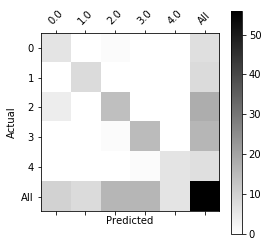

In [42]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

## 3. Emojifier-V2: Using LSTMs in Keras

In [43]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [44]:
def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0] # number of training examples
    
    X_indices = np.zeros((m, max_len))
    
    for i in range(m): # loop over training examples
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            X_indices[i, j] = word_to_index[w]
            j = j + 1
                
    return X_indices

In [45]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [47]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1                  
    emb_dim = word_to_vec_map["cucumber"].shape[0]      
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    embedding_layer = Embedding(vocab_len, emb_dim,trainable=False)

    embedding_layer.build((None,))
    
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [48]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

weights[0][1][3] = -0.3403


In [51]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    sentence_indices = Input(shape=input_shape, dtype=np.int32)
    embedding_layer =  pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    embeddings = embedding_layer(sentence_indices)   
    X = LSTM(128, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)
    X = LSTM(128)(X)
    X = Dropout(0.5)(X)
    X = Dense(5, activation='softmax')(X)
    X =  Activation('softmax')(X)
    
    model = Model(sentence_indices, X)
    
    return model

In [52]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
__________

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

In [60]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

Epoch 1/50
183/183 [==============================] - 1s 8ms/step - loss: 1.6019 - acc: 0.2459
Epoch 2/50
183/183 [==============================] - 0s 743us/step - loss: 1.5626 - acc: 0.3115
Epoch 3/50
183/183 [==============================] - 0s 738us/step - loss: 1.5412 - acc: 0.3552
Epoch 4/50
183/183 [==============================] - 0s 781us/step - loss: 1.5312 - acc: 0.3607
Epoch 5/50
183/183 [==============================] - 0s 738us/step - loss: 1.5030 - acc: 0.3989
Epoch 6/50
183/183 [==============================] - 0s 989us/step - loss: 1.4897 - acc: 0.3934
Epoch 7/50
183/183 [==============================] - 0s 1ms/step - loss: 1.4423 - acc: 0.4590
Epoch 8/50
183/183 [==============================] - 0s 1ms/step - loss: 1.3786 - acc: 0.5519
Epoch 9/50
183/183 [==============================] - 0s 1ms/step - loss: 1.3376 - acc: 0.5847
Epoch 10/50
183/183 [==============================] - 0s 902us/step - loss: 1.3452 - acc: 0.5519
Epoch 11/50
183/183 [================

In [63]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print("\nTest accuracy = ", acc)

56/56 [==============================] - 0s 317us/step

Test accuracy =  0.8571428571428571


In [69]:
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😄 prediction: he got a very nice raise	❤️
Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😄 prediction: he is a good friend	❤️
Expected emoji:😞 prediction: work is hard	😄
Expected emoji:⚾ prediction: enjoy your game😄
Expected emoji:😄 prediction: will you be my valentine	❤️
Expected emoji:❤️ prediction: I like your jacket 	😄
Expected emoji:🍴 prediction: I did not have breakfast 😞


In [77]:
x_test = np.array(['feeling happy today','not feeling happy today'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(x_test)):
    num = np.argmax(pred[i])
    print(x_test[i] +' '+  label_to_emoji(num))

feeling happy today 😄
not feeling happy today 😞
